<a href="https://colab.research.google.com/github/Shashwat-23/Almabetter/blob/main/Self_Project_Insurance_Decisioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more.

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

## <b>In this self project, you are required to do </b>

* ### Perform exploratory data analysis
* ### Build logistic regression, random forest, gradient boosted decision trees and xgboost models
* ### Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

## <b>Some of the guidelines for the project :</b>
* ### Describe in detail each of the experiments
* ### Include plots and charts
* ### Draw the final conclusion on the basis of comparison of different models.

# <b><u>Variable Description

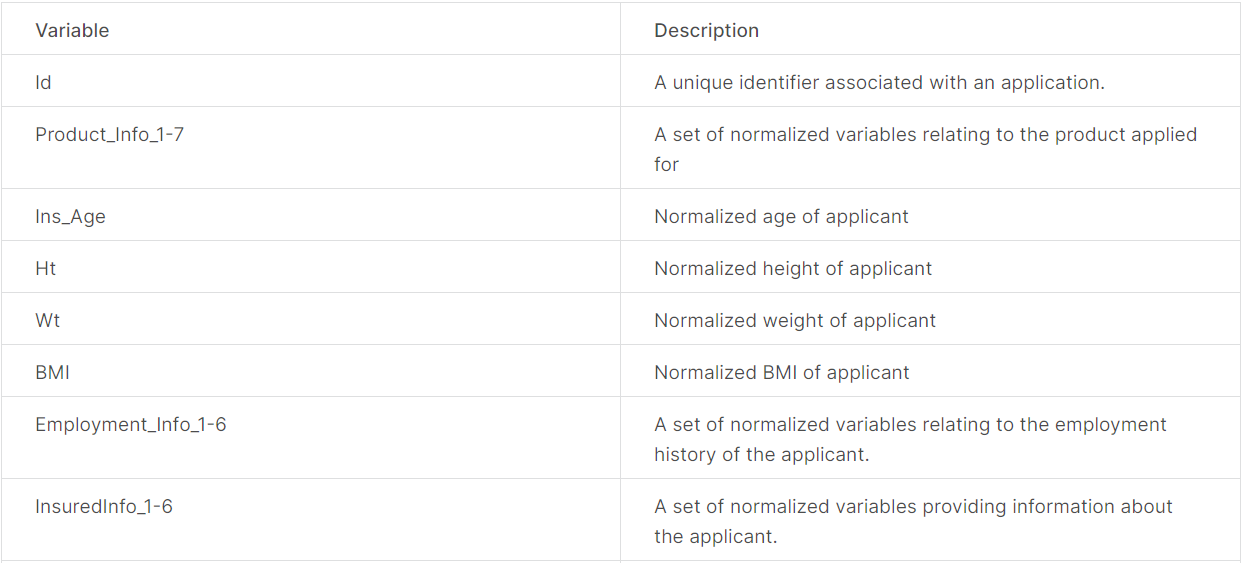

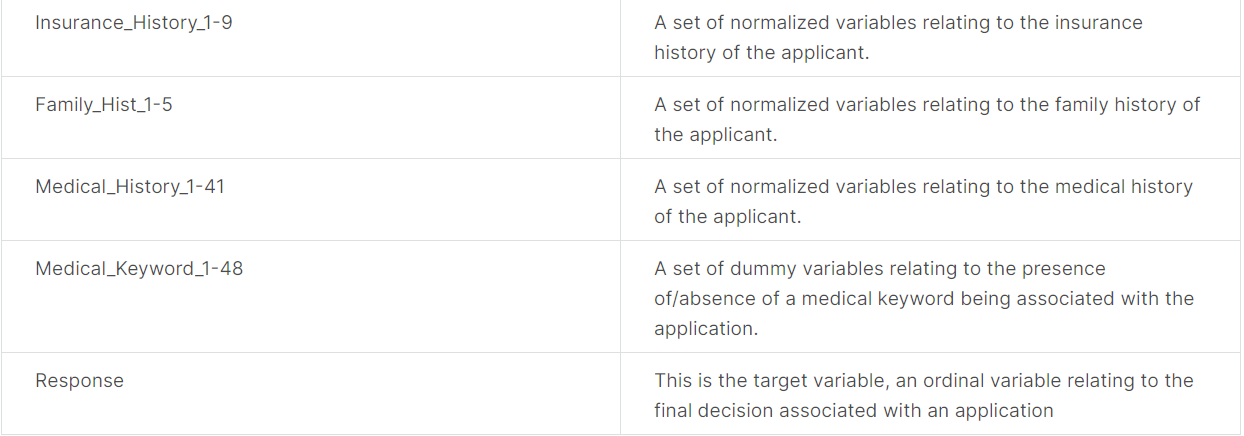

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from xgboost import XGBClassifier

In [4]:
insurance_df=pd.read_csv('/content/train.csv', index_col='Id')
test_df=pd.read_csv('/content/test.csv')

In [5]:
pd.set_option('display.max_columns', 200)

In [6]:
insurance_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [7]:
insurance_df.shape

(59381, 127)

In [8]:
insurance_df['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

In [9]:
insurance_df['Response'].isnull().sum()

0

<Axes: xlabel='Response', ylabel='count'>

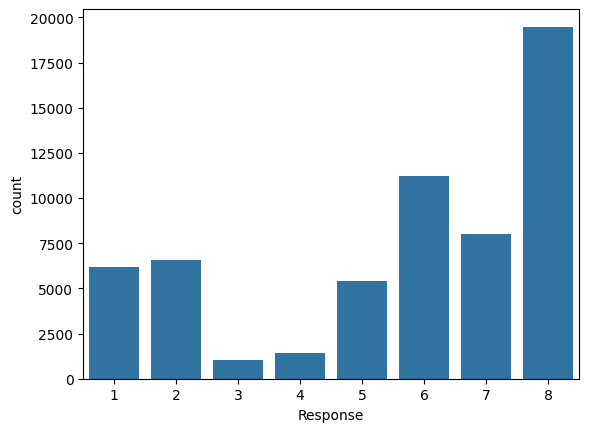

In [10]:
sns.countplot(x=insurance_df['Response'])

In [11]:
def modified_response(row):
  if ((row['Response'] <=7) & (row['Response'] >=0) ):
    val = 0
  elif (row['Response']==8):
    val = 1
  else:
    val = -1

  return val

In [12]:
insurance_df['Modified_Response'] = insurance_df.apply(modified_response,axis = 1)

In [13]:
insurance_df['Modified_Response'].value_counts()

0    39892
1    19489
Name: Modified_Response, dtype: int64

<Axes: xlabel='Modified_Response', ylabel='count'>

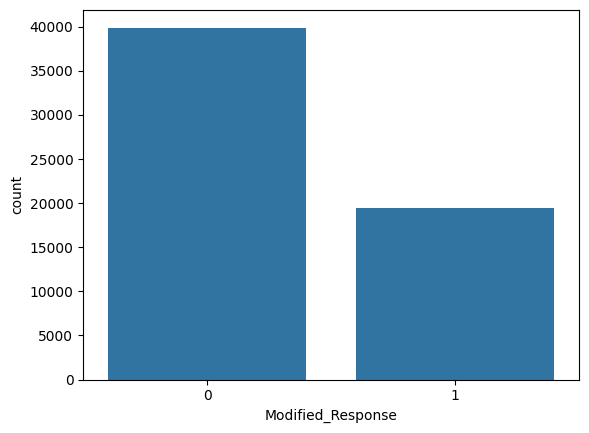

In [14]:
sns.countplot(x= insurance_df['Modified_Response'])

In [15]:
insurance_df.drop('Response',axis = 1, inplace=True)

In [16]:
missing_val_count_by_column = insurance_df.isnull().sum()/len(insurance_df)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


In [17]:
insurance_df = insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,axis=1)

In [18]:
insurance_df.shape

(59381, 122)

In [19]:
list(insurance_df.columns)

['Product_Info_1',
 'Product_Info_2',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_History_16'

In [20]:
insurance_df['Product_Info_2'].head(20)

Id
2     D3
5     A1
6     E1
7     D4
8     D2
10    D2
11    A8
14    D2
15    D3
16    E1
17    D3
18    D4
19    A2
20    D1
22    D4
23    A7
24    D4
25    D3
26    D3
27    D4
Name: Product_Info_2, dtype: object

In [21]:
insurance_df['Product_Info_2'].value_counts()

D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64

In [22]:
insurance_df.drop('Product_Info_2',axis=1,inplace=True)

<ipython-input-22-0f21ed4826ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df.drop('Product_Info_2',axis=1,inplace=True)


In [23]:
insurance_df.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Modified_Response'],
      dtype='object', length=121)

In [24]:
# Data for all the independent variables
X = insurance_df.drop(labels='Modified_Response',axis=1)

# Data for the dependent variable
Y = insurance_df['Modified_Response']

In [25]:
pd.set_option('display.max_rows',200)

In [26]:
X.isnull().sum()

Product_Info_1             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         19
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       6779
Employment_Info_5          0
Employment_Info_6      10854
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    25396
Insurance_History_7        0
Insurance_History_8        0
Insurance_History_9        0
Family_Hist_1              0
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4 

In [27]:
Y.isnull().sum()

0

In [28]:
X.shape,Y.shape

((59381, 120), (59381,))

In [29]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [30]:
X_train.isnull().sum()

Product_Info_1             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         18
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       5086
Employment_Info_5          0
Employment_Info_6       8210
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    19088
Insurance_History_7        0
Insurance_History_8        0
Insurance_History_9        0
Family_Hist_1              0
Family_Hist_2          21458
Family_Hist_3          25692
Family_Hist_4 

In [31]:
X_test.isnull().sum()

Product_Info_1            0
Product_Info_3            0
Product_Info_4            0
Product_Info_5            0
Product_Info_6            0
Product_Info_7            0
Ins_Age                   0
Ht                        0
Wt                        0
BMI                       0
Employment_Info_1         1
Employment_Info_2         0
Employment_Info_3         0
Employment_Info_4      1693
Employment_Info_5         0
Employment_Info_6      2644
InsuredInfo_1             0
InsuredInfo_2             0
InsuredInfo_3             0
InsuredInfo_4             0
InsuredInfo_5             0
InsuredInfo_6             0
InsuredInfo_7             0
Insurance_History_1       0
Insurance_History_2       0
Insurance_History_3       0
Insurance_History_4       0
Insurance_History_5    6308
Insurance_History_7       0
Insurance_History_8       0
Insurance_History_9       0
Family_Hist_1             0
Family_Hist_2          7198
Family_Hist_3          8549
Family_Hist_4          4848
Medical_History_1   

In [32]:
mean_of_X_train=X_train.mean()

In [33]:
X_train=X_train.fillna(mean_of_X_train)

In [34]:
X_test=X_test.fillna(mean_of_X_train)

In [35]:
# X_train.isnull().sum()
X_test.isnull().sum()

Product_Info_1         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_5    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
Family_Hist_2          0
Family_Hist_3          0
Family_Hist_4          0
Medical_History_1      0
Medical_History_2      0
Medical_History_3      0
Medical_History_4      0
Medical_History_5      0


In [36]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(44535, 120) (44535,)
(14846, 120) (14846,)


In [37]:
# XGboost
model_XGB=XGBClassifier()
model_XGB.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
Y_train_preds=model_XGB.predict(X_train)
Y_test_preds=model_XGB.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(Y_train_preds,Y_train)

0.8830807230268328

In [41]:
accuracy_score(Y_test_preds,Y_test)

0.8303920247878216

In [42]:
# Cross Validation on XGBoost
# A parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    # 'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

In [43]:
model_of_XGB_CV=XGBClassifier()

In [44]:
XGB_grid=GridSearchCV(
    estimator=model_of_XGB_CV,
    param_grid=param_grid,
    scoring='roc_auc',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    # n_jobs=-1  # Use all available CPU cores
)

In [46]:
XGB_grid.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc')

In [47]:
# Print the best parameters and corresponding accuracy
print("Best Parameters: ", XGB_grid.best_params_)
print("Best Accuracy: {:.2f}%".format(XGB_grid.best_score_ * 100))

Best Parameters:  {'colsample_bytree': 1.0, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best Accuracy: 90.81%


In [48]:
XGB_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
XGB_optimal_model = XGB_grid.best_estimator_

In [50]:
XGB_grid.best_params_

{'colsample_bytree': 1.0, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}

In [51]:
# Making predictions on train and test data

train_class_preds = XGB_optimal_model.predict(X_train)
test_class_preds = XGB_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = XGB_optimal_model.predict_proba(X_train)[:,1]
test_preds = XGB_optimal_model.predict_proba(X_test)[:,1]

In [52]:
len(train_preds)

44535

In [53]:
test_class_preds

array([0, 1, 0, ..., 0, 0, 1])

In [54]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [55]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,train_class_preds)
test_accuracy = accuracy_score(Y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8471314696306276
The accuracy on test dataset is 0.8319412636400377


In [56]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(Y_train,train_class_preds)
test_cm = confusion_matrix(Y_test,test_class_preds )

In [57]:
train_cm

array([[26213,  3694],
       [ 3114, 11514]])

In [58]:
test_cm

array([[8663, 1322],
       [1173, 3688]])

In [59]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(Y_train,train_preds)
test_auc = roc_auc_score(Y_test,test_preds)

In [60]:
train_auc

0.9243571007595062

In [61]:
test_auc

0.9082676060995422

In [62]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.5 MB/s eta 0:00:00


In [63]:
X_train.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       ...
       'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41',
       'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44',
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48'],
      dtype='object', length=120)

In [64]:
XGB_optimal_model.feature_importances_

array([0.01258999, 0.00298165, 0.02063469, 0.00411343, 0.00174135,
       0.00379475, 0.00671223, 0.00250122, 0.00581711, 0.09933736,
       0.00231471, 0.00390517, 0.        , 0.00277212, 0.        ,
       0.00220162, 0.00293908, 0.01560166, 0.00185539, 0.00335648,
       0.00831919, 0.02243527, 0.01834071, 0.00181026, 0.01005612,
       0.00296439, 0.00181339, 0.00245364, 0.00741819, 0.00152285,
       0.00448872, 0.01231794, 0.00270828, 0.00612498, 0.00327412,
       0.0025115 , 0.00222755, 0.00402294, 0.07301421, 0.01264844,
       0.        , 0.00260476, 0.00291948, 0.00157071, 0.00515743,
       0.00233818, 0.01006569, 0.00329006, 0.00230696, 0.00851499,
       0.00708777, 0.00230306, 0.01196543, 0.00278624, 0.        ,
       0.2234902 , 0.00266352, 0.        , 0.00269581, 0.00437732,
       0.00288636, 0.03292058, 0.00624107, 0.00537646, 0.00262992,
       0.00280525, 0.00160931, 0.00291034, 0.        , 0.00652137,
       0.01664093, 0.0027855 , 0.0016756 , 0.        , 0.06162

In [65]:
importances = XGB_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [66]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [67]:
importance_df.head()

,Feature,Feature Importance
0,Product_Info_1,0.01
1,Product_Info_3,0.00
2,Product_Info_4,0.02
3,Product_Info_5,0.00
4,Product_Info_6,0.00


In [68]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
55,Medical_History_23,0.22
9,BMI,0.10
38,Medical_History_4,0.07
86,Medical_Keyword_15,0.06
74,Medical_Keyword_3,0.06
61,Medical_History_30,0.03
94,Medical_Keyword_23,0.02
70,Medical_History_40,0.02
22,InsuredInfo_7,0.02
21,InsuredInfo_6,0.02


In [69]:
import shap
shap.initjs()

In [70]:
X_shap=X_train
explainer=shap.TreeExplainer(XGB_optimal_model)
shap_values=explainer.shap_values(X_shap)

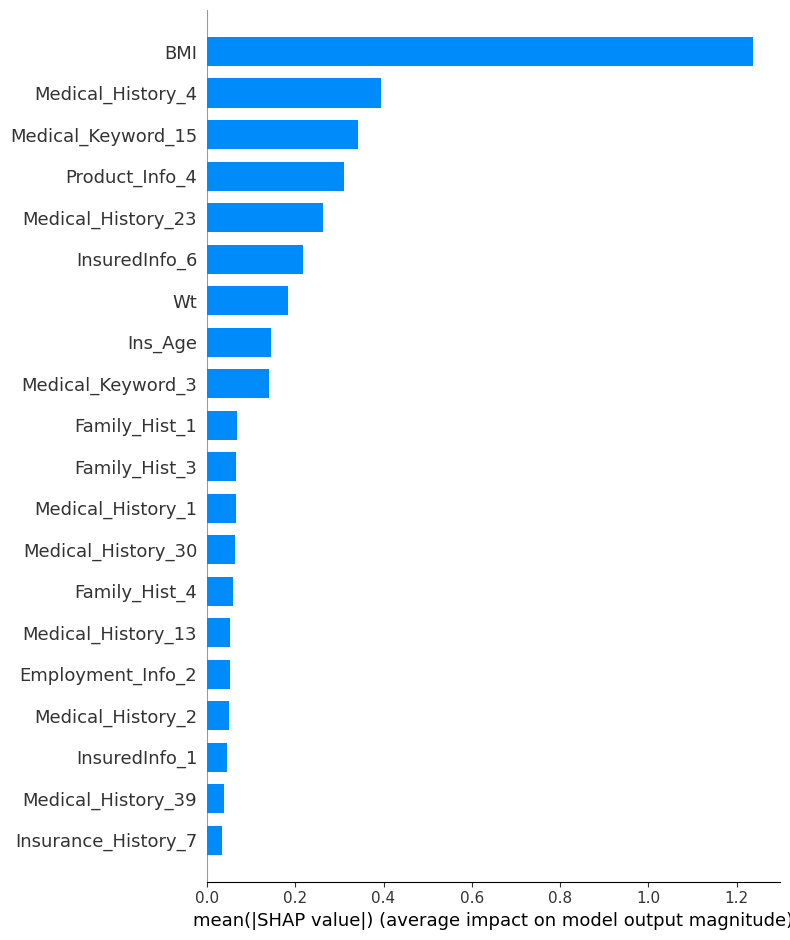

In [71]:
# Create a summary plot
shap.summary_plot(shap_values, X_shap, plot_type="bar", show=False)
plt.show()

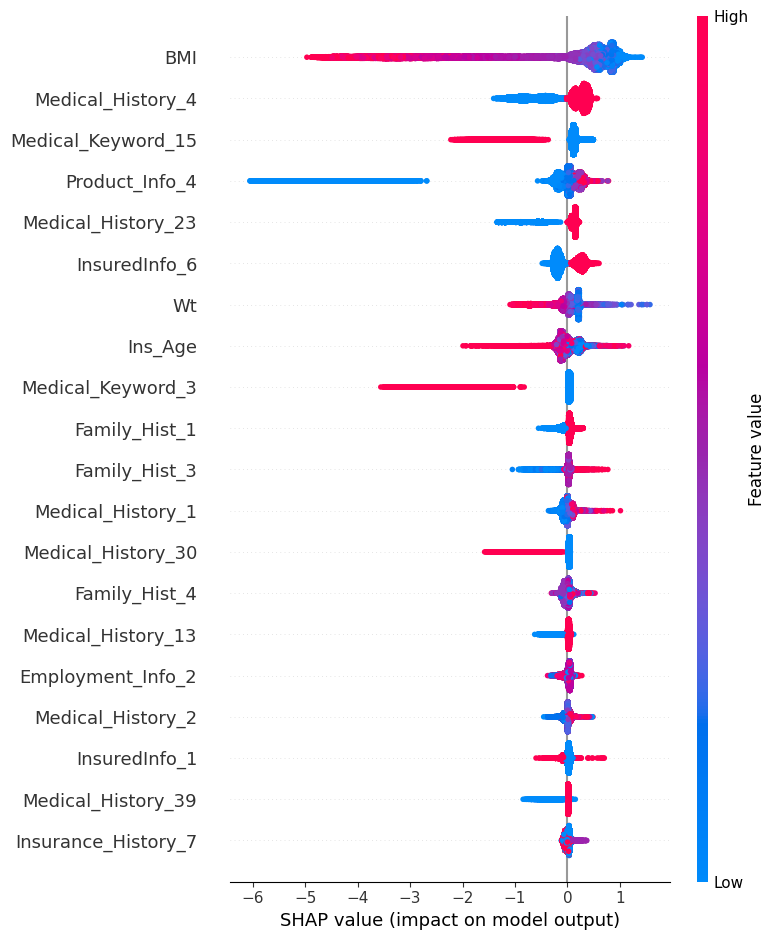

In [73]:
shap.summary_plot(shap_values, X_shap, show=False)

In [72]:
# shap.force_plot(explainer.expected_value, shap_values, X_shap, show=True)